In [3]:
from torchvision.datasets import MNIST 
import numpy as np 

ds = MNIST("data", download=True, train=True)
labels = ds.targets
imgs = ds.train_data
imgs.shape

d = {}

for i in np.unique(labels):
    d[i] = imgs[labels == i]
    

/home/kirchhei/.local/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [2]:
import random

def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""

    dividers = sorted(random.sample(range(0, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

def generate(total=20):
    nums = [11]
    while max(nums) >= 10:
        nums = constrained_sum_sample_pos(4, total)
        # print(nums)
    
    nums = np.random.permutation(nums)
    tmp[0:28,0:28] = d[nums[0]][np.random.randint(0, len(d[nums[0]]))]
    tmp[28:56,0:28] = d[nums[1]][np.random.randint(0, len(d[nums[1]]))]
    tmp[0:28,28:56] = d[nums[2]][np.random.randint(0, len(d[nums[2]]))]
    tmp[28:56,28:56] = d[nums[3]][np.random.randint(0, len(d[nums[3]]))]
    return tmp, nums

In [3]:
import torch 
import matplotlib.pyplot as plt 

imgs = []
labels = []


for i in range(60000):
    tmp = torch.zeros(size=(56,56))
    tmp, nums = generate(total=20)
    imgs.append(tmp.numpy())
    labels.append(nums)


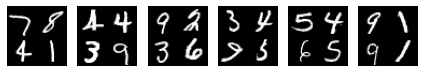

In [4]:
t = 5
fig, ax = plt.subplots(1,t+1)

ax = ax.flatten()

start_i = 110

for i, n in enumerate(np.random.permutation(range(start_i, start_i+t+1))):
    if i == 3:
        ax[i].imshow(generate(21)[0], cmap="gray")
        ax[i].axis('off')
    else:
        ax[i].imshow(imgs[n], cmap="gray")
        ax[i].axis('off')
    
# add some unknown example 
# d = np.load("x-test.npz")
# data = d["arr_0"]

plt.axis('off')
plt.tight_layout()
plt.savefig("mnist-example.png", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
labels = np.array(labels)
imgs = np.array(imgs)

In [7]:
np.savez("sumnist/y-train.npz", labels)
np.savez("sumnist/x-train.npz", imgs)

In [8]:
ds = MNIST("data", download=True, train=False)
labels = ds.targets
imgs = ds.train_data
imgs.shape

d = {}

for i in np.unique(labels):
    d[i] = imgs[labels == i]

/home/ki/.local/share/anaconda3/envs/myenv/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [9]:
imgs = []
labels = []

for i in range(10000):
    tmp = torch.zeros(size=(56,56))
    tmp, nums = generate()
    imgs.append(tmp.numpy())
    labels.append(nums)


In [15]:
        
for i in [10,11,12,13,14,15,16,17,18,19,21,22,23,24,25]:
    print(i)
    for _ in range(100):
        tmp = torch.zeros(size=(56,56))
        tmp, nums = generate(i)
        imgs.append(tmp.numpy())
        labels.append(nums)

10
11
12
13
14
15
16
17
18
19
21
22
23
24
25


In [16]:
len(labels)

12250

In [17]:
np.savez("sumnist/y-test.npz", labels)
np.savez("sumnist/x-test.npz", imgs)

# Visualizations 

In [30]:
import numpy as np 
import torch 

with np.load("sumnist/x-test.npz") as data:
    x_test = torch.tensor(data['arr_0'])

with np.load("sumnist/y-train.npz") as data:
    y_train = torch.tensor(data['arr_0'])
    
with np.load("sumnist/x-train.npz") as data:
    x_train = torch.tensor(data['arr_0'])
    
with np.load("sumnist/y-test.npz") as data:
    y_test = torch.tensor(data['arr_0'])

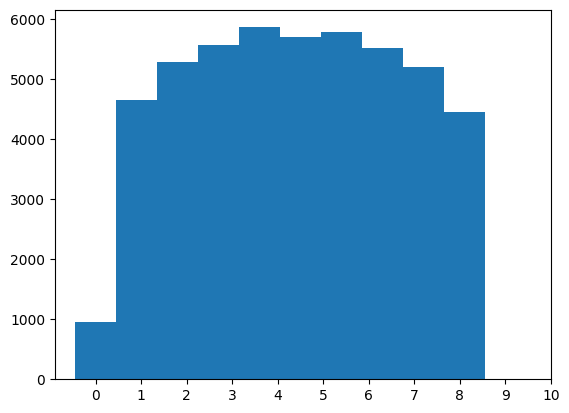

In [39]:
import matplotlib.pyplot as plt 

plt.hist(y_test.flatten().numpy(), bins=10, align="left")
_ = plt.xticks(range(11))

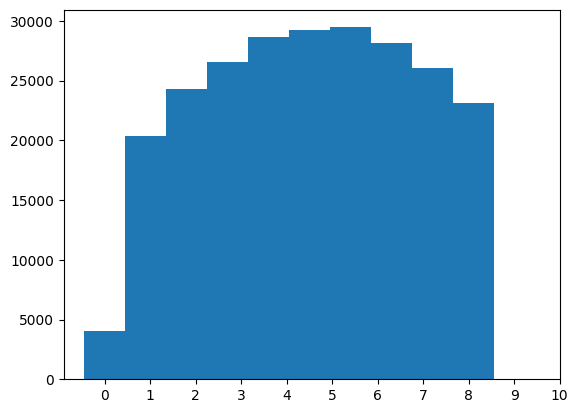

In [40]:
plt.hist(y_train.flatten().numpy(), bins=10, align="left")
_ = plt.xticks(range(11))

In [24]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun